In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
from tabulate import tabulate
!pip3 install s3fs
!pip3 install fsspec

     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 125 kB 10.4 MB/s 
     |████████████████████████████████| 7.7 MB 50.2 MB/s 
     |████████████████████████████████| 1.3 MB 49.0 MB/s 
     |████████████████████████████████| 160 kB 65.1 MB/s 
     |████████████████████████████████| 271 kB 66.4 MB/s 
     |████████████████████████████████| 138 kB 93.3 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-1.4.2-py3-none-any.whl size=49925 sha256=ba4bb90b4e6d67493ec721a8c2a42796312a643daada798cc82731de48a27352
  Stored in directory: /root/.cache/pip/wheels/33/e7/d9/b297a9aa9c43d56bc2463e6e2771655ff638f30b30f0b61fcb
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of 

In [ ]:
#Reading final_app_events csv file and loading it in a DF
dfappevent=pd.read_csv('s3://capstone-project-sep2021/final_app_events.csv', delimiter=',', names= ["event_id", "app_id", "is_installed", "is_active"])

In [ ]:
#First 10 entries of the new DF
dfappevent.head(10)

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1
5,2,4775896950989639373,1,1
6,2,-8022267440849930066,1,0
7,2,9112463267739110219,1,0
8,2,-3725672010020973973,1,0
9,2,7167114343576723123,1,1


In [ ]:
#Getting the info of the new DF
dfappevent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column        Dtype
---  ------        -----
 0   event_id      int64
 1   app_id        int64
 2   is_installed  int64
 3   is_active     int64
dtypes: int64(4)
memory usage: 991.0 MB


In [ ]:
#Validating to see if there are any null entries
dfappevent.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

In [ ]:
#Ensuring that app_id has absolute values
dfappevent['app_id']=dfappevent.app_id.apply(abs)

In [ ]:
#Revalidating the entries post above entry
dfappevent.head(10)

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,5720078949152207372,1,0
2,2,1633887856876571208,1,0
3,2,653184325010919369,1,1
4,2,8693964245073640147,1,1
5,2,4775896950989639373,1,1
6,2,8022267440849930066,1,0
7,2,9112463267739110219,1,0
8,2,3725672010020973973,1,0
9,2,7167114343576723123,1,1


In [ ]:
#Reading final_label_data csv file and loading it in a DF
dflabeldata = pd.read_csv('s3://capstone-project-sep2021/final_label_data.csv',delimiter=',',names=["app_id","category"], engine='python', error_bad_lines=False)

Skipping line 123004: ',' expected after '"'
Skipping line 123005: ',' expected after '"'
Skipping line 123006: ',' expected after '"'
Skipping line 123007: ',' expected after '"'
Skipping line 123008: ',' expected after '"'
Skipping line 123009: ',' expected after '"'
Skipping line 123010: ',' expected after '"'
Skipping line 123011: ',' expected after '"'
Skipping line 123012: ',' expected after '"'
Skipping line 123013: ',' expected after '"'
Skipping line 123014: field larger than field limit (131072)
Skipping line 125799: ',' expected after '"'
Skipping line 125800: ',' expected after '"'
Skipping line 125801: ',' expected after '"'
Skipping line 125802: ',' expected after '"'
Skipping line 125803: ',' expected after '"'
Skipping line 125804: ',' expected after '"'
Skipping line 125805: ',' expected after '"'
Skipping line 125806: field larger than field limit (131072)
Skipping line 126210: ',' expected after '"'
Skipping line 126220: ',' expected after '"'
Skipping line 126482: '

In [ ]:
#Getting the info of the new DF
dflabeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436835 entries, 0 to 436834
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    436835 non-null  int64 
 1   category  436835 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.7+ MB


In [ ]:
#changing the type of the
dflabeldata['category']=dflabeldata['category'].apply(lambda x : str(x))
dflabeldata['app_id']=dflabeldata.app_id.apply(abs)

In [ ]:
dflabeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436835 entries, 0 to 436834
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    436835 non-null  int64 
 1   category  436835 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.7+ MB


In [ ]:
#Reading final_events_data csv file and loading it in a DF
dfeventdata=pd.read_csv('s3://capstone-project-sep2021/final_event_data.csv',delimiter=',', names= ["device_id",'gender','age','age_group',"event_id","timestamp",'longitude','latitude'])

In [ ]:
#First 10 entries of the new DF
dfeventdata.head(10)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude
0,-9223067244542180000,M,24,M0-24,\N,\N,\N,\N
1,-9222956879900150000,M,36,M32+,11281,2016-05-07 11:36:04,0.0,0.0
2,-9222956879900150000,M,36,M32+,12679,2016-05-07 12:18:35,113.24,23.19
3,-9222956879900150000,M,36,M32+,49383,2016-05-07 15:44:45,0.0,0.0
4,-9222956879900150000,M,36,M32+,131849,2016-05-07 12:06:35,113.24,23.19
5,-9222956879900150000,M,36,M32+,205471,2016-05-06 15:36:46,113.24,23.19
6,-9222956879900150000,M,36,M32+,211711,2016-05-06 21:26:14,113.24,23.19
7,-9222956879900150000,M,36,M32+,229069,2016-05-06 15:34:19,113.24,23.19
8,-9222956879900150000,M,36,M32+,229087,2016-05-06 15:33:50,113.24,23.19
9,-9222956879900150000,M,36,M32+,289564,2016-05-06 21:26:44,113.24,23.19


In [ ]:
#Getting the info of the new DF
dfeventdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   device_id  1266933 non-null  int64 
 1   gender     1266933 non-null  object
 2   age        1266933 non-null  int64 
 3   age_group  1266933 non-null  object
 4   event_id   1266933 non-null  object
 5   timestamp  1266933 non-null  object
 6   longitude  1266933 non-null  object
 7   latitude   1266933 non-null  object
dtypes: int64(2), object(6)
memory usage: 77.3+ MB


In [ ]:
dfeventdata["event_id"]=dfeventdata["event_id"].str.replace("\\","",)
dfeventdata["timestamp"]=dfeventdata["timestamp"].str.replace("\\","",)
dfeventdata["longitude"]=dfeventdata["longitude"].str.replace("\\","",)
dfeventdata["latitude"]=dfeventdata["latitude"].str.replace("\\","",)

dfeventdata["event_id"]=dfeventdata["event_id"].str.replace("N","0",)
dfeventdata["timestamp"]=dfeventdata["timestamp"].str.replace("N","2021-05-05 00:00:00",)
dfeventdata["longitude"]=dfeventdata["longitude"].str.replace("N","0",)
dfeventdata["latitude"]=dfeventdata["latitude"].str.replace("N","0",)

In [ ]:
#change datatypes to required datatype format.
dfeventdata['device_id']=dfeventdata['device_id'].apply(abs)
dfeventdata['timestamp']=pd.to_datetime(dfeventdata['timestamp'])
dfeventdata["longitude"]=dfeventdata["longitude"].astype(float)
dfeventdata["latitude"]=dfeventdata["latitude"].astype(float)
dfeventdata['event_id']=dfeventdata["event_id"].astype(int)
dfeventdata['gender']=dfeventdata["gender"].astype("string")
dfeventdata['age_group']=dfeventdata["age_group"].astype("string")

In [ ]:
dfeventdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   device_id  1266933 non-null  int64         
 1   gender     1266933 non-null  string        
 2   age        1266933 non-null  int64         
 3   age_group  1266933 non-null  string        
 4   event_id   1266933 non-null  int64         
 5   timestamp  1266933 non-null  datetime64[ns]
 6   longitude  1266933 non-null  float64       
 7   latitude   1266933 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), string(2)
memory usage: 77.3 MB


In [ ]:
dfeventdata.describe()

,device_id,age,event_id,longitude,latitude
count,1.266933e+06,1.266933e+06,1.266933e+06,1.266933e+06,1.266933e+06
mean,4.634877e+18,3.340051e+01,1.560763e+06,7.521735e+01,2.094308e+01
std,2.617042e+18,9.762003e+00,9.747112e+05,5.493059e+01,1.592072e+01
min,5.036611e+13,1.000000e+00,0.000000e+00,-1.800000e+02,-3.380000e+01
25%,2.400791e+18,2.600000e+01,7.091030e+05,0.000000e+00,0.000000e+00
50%,4.645192e+18,3.100000e+01,1.557841e+06,1.122600e+02,2.782000e+01
75%,6.854440e+18,3.900000e+01,2.405959e+06,1.170400e+02,3.305000e+01
max,9.223067e+18,9.600000e+01,3.252948e+06,1.511800e+02,5.364000e+01


In [ ]:
#validating longitude values.  longitude should be between -180 to 180
dfeventdata.longitude.describe()

count    1.266933e+06
mean     7.521735e+01
std      5.493059e+01
min     -1.800000e+02
25%      0.000000e+00
50%      1.122600e+02
75%      1.170400e+02
max      1.511800e+02
Name: longitude, dtype: float64

In [ ]:
 #validating latitude values.  latitude should be between -90 to 90
 dfeventdata.latitude.describe()

count    1.266933e+06
mean     2.094308e+01
std      1.592072e+01
min     -3.380000e+01
25%      0.000000e+00
50%      2.782000e+01
75%      3.305000e+01
max      5.364000e+01
Name: latitude, dtype: float64

In [ ]:
#Reading final_non_event_data csv file and loading it in a DF
dfnoneventdata=pd.read_csv('s3://capstone-project-sep2021/final_non_event_data.csv',delimiter=',', names= ["device_id","gender",'age',"age_group","device_brand","phone_brand"], encoding='utf-8')

In [ ]:
dfnoneventdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74646 entries, 0 to 74645
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74646 non-null  int64 
 1   gender        74646 non-null  object
 2   age           74646 non-null  int64 
 3   age_group     74646 non-null  object
 4   device_brand  74646 non-null  object
 5   phone_brand   74646 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
dfnoneventdata.head(10)

,device_id,gender,age,age_group,device_brand,phone_brand
0,-9223067244542180000,M,24,M0-24,vivo,Y19T
1,-9222956879900150000,M,36,M32+,samsung,Galaxy Note 2
2,-9222754701995930000,M,29,M25-32,Coolpad,8730L
3,-9222352239947200000,M,23,M0-24,Xiaomi,xnote11
4,-9222173362545970000,F,56,F32+,samsung,Galaxy Note 2
5,-9221639938103560000,F,27,F25-32,Xiaomi,xnote2
6,-9221307795397200000,M,33,M32+,Coolpad,900tr2123
7,-9221086586254640000,M,29,M25-32,Xiaomi,x11S
8,-9221066489596330000,M,31,M25-32,lenovo,K860i
9,-9221046405740900000,M,38,M32+,Huawei,G510


In [ ]:
#change datatypes to required datatype format.
dfnoneventdata['device_id']=dfnoneventdata['device_id'].apply(abs)
dfnoneventdata['device_brand']=dfnoneventdata["device_brand"].astype("str")
dfnoneventdata['gender']=dfnoneventdata["gender"].astype("str")
dfnoneventdata['phone_brand']=dfnoneventdata.phone_brand.str.replace(r'[^\x00-\x7F]+', '')

In [ ]:
dfnoneventdata.head(10)

,device_id,gender,age,age_group,device_brand,phone_brand
0,9223067244542180000,M,24,M0-24,vivo,Y19T
1,9222956879900150000,M,36,M32+,samsung,Galaxy Note 2
2,9222754701995930000,M,29,M25-32,Coolpad,8730L
3,9222352239947200000,M,23,M0-24,Xiaomi,xnote11
4,9222173362545970000,F,56,F32+,samsung,Galaxy Note 2
5,9221639938103560000,F,27,F25-32,Xiaomi,xnote2
6,9221307795397200000,M,33,M32+,Coolpad,900tr2123
7,9221086586254640000,M,29,M25-32,Xiaomi,x11S
8,9221066489596330000,M,31,M25-32,lenovo,K860i
9,9221046405740900000,M,38,M32+,Huawei,G510


In [ ]:
#Geospatial Visualization

In [ ]:
#Plot the visualization plot for a sample of 1 lakh data points.

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     \ 133.1 MB 8.8 MB/s
     |████████████████████████████████| 6.3 MB 5.2 MB/s 
     |████████████████████████████████| 219 kB 52.7 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759610 sha256=9b7852a0fa913355a97af422f0996cfbd356efba85729def9b1f381173c6d9f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4k2sk57m/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=7d1a17680d0a1bacd07e8224c1a02be2878d5900a8ac63568806b400d9ad6fa7
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built basemap pyshp


In [ ]:
train = dfeventdata.sample(100000)
train.head()

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude
265549,5395726473773800000,F,70,F32+,1722365,2016-05-04 16:45:59,121.42,31.24
843022,3036199120978700000,M,42,M32+,2834736,2016-05-06 17:32:19,0.00,0.00
1019681,5518750837082750000,M,27,M25-32,39294,2016-05-07 09:23:53,103.84,30.71
868074,3396214697706440000,M,25,M25-32,2858637,2016-05-05 16:41:28,0.00,0.00
605265,574247655320808000,M,37,M32+,2137723,2016-05-06 23:03:46,0.00,0.00


In [ ]:
from mpl_toolkits.basemap import Basemap

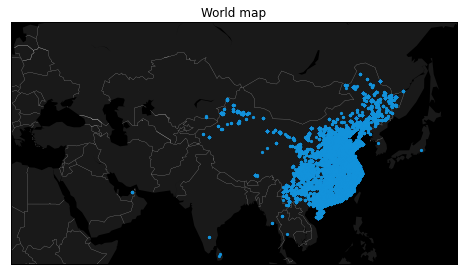

In [ ]:
ig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=5,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=60, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=20, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=150, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(train["longitude"].tolist(), train["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("World map")
plt.show()

In [ ]:
#Compare the event visualization plots based on the users' gender information. [This can be done on the sample of 1 lakh data points.]

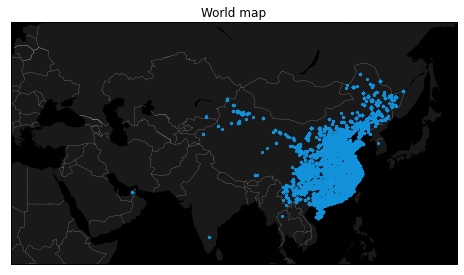

In [ ]:
mtrain=train[train['gender']=='M']
ig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=5,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=60, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=20, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=150, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(mtrain["longitude"].tolist(), mtrain["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("World map")
plt.show()

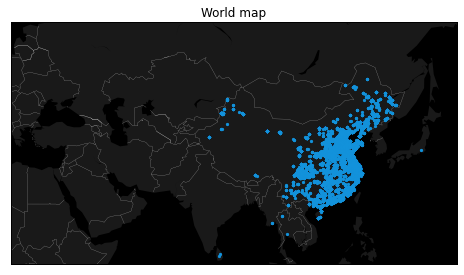

In [ ]:
ftrain=train[train['gender']=='F']
ig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=5,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=60, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=20, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=150, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(ftrain["longitude"].tolist(), ftrain["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("World map")
plt.show()

In [ ]:
#Compare the event visualization plots based on the following age groups: 0–24, 25–32, 32+

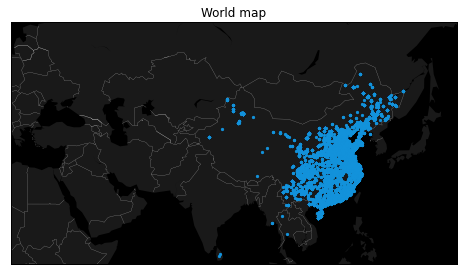

In [ ]:
agetrain=train[train['age_group'].str.contains('25-32')]
ig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=5,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=60, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=20, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=150, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(agetrain["longitude"].tolist(), agetrain["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("World map")
plt.show()

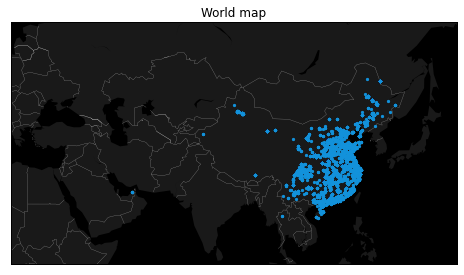

In [ ]:
agetrain=train[train['age_group'].str.contains('0-24')]
ig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=5,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=60, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=20, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=150, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(agetrain["longitude"].tolist(), agetrain["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("World map")
plt.show()

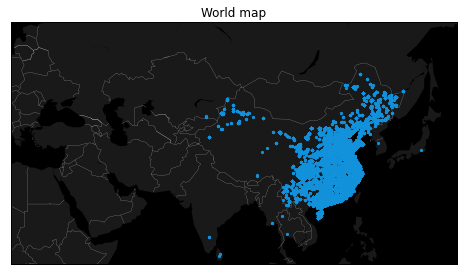

In [ ]:
agetrain=train[train['age_group'].str.contains('32+')]
ig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=5,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=60, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=20, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=150, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(agetrain["longitude"].tolist(), agetrain["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("World map")
plt.show()